In [46]:
import xarray as xr
import numpy as np
import cftime
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


ERROR 1: PROJ: proj_create_from_database: Open of /nesi/project/niwa00018/queenle/ml_env_v2/share/proj failed


In [13]:
imperfect_ds

<xarray.Dataset>
Dimensions:   (GCM: 3, time: 14600, lat: 172, lon: 179)
Coordinates:
  * GCM       (GCM) object 'ACCESS-CM2' 'EC-Earth3' 'NorESM2-MM'
  * lon       (lon) float32 164.9 165.0 165.1 165.2 ... 183.6 183.7 183.9 184.0
  * lat       (lat) float32 -51.21 -51.11 -51.0 -50.89 ... -33.07 -32.97 -32.86
  * time      (time) object 1986-01-01 12:00:00 ... 2099-12-31 12:00:00
    scenario  (time) object ...
Data variables:
    pr        (GCM, time, lat, lon) float32 ...
Attributes: (12/28)
    CDI:             Climate Data Interface version 1.9.5 (http://mpimet.mpg....
    history:         Tue Mar 12 14:54:26 2024: cdo merge /nesi/project/niwa00...
    source:          CSIRO conformal-cubic model. Input file: surf.ccam_12km....
    Conventions:     CF-1.7
    title:           CCAM simulation data
    il:              288
    ...              ...
    BC_version:      no output bias correction
    CMOR_v:          v1.0 Public
    CDO_call:        daymean computed on hourly data
    project:         NIWA CMIP6 Downscaling
    contact:         Peter Gibson (peter.gibson@niwa.co.nz)
    CDO:             Climate Data Operators version 1.9.5 (http://mpimet.mpg....

In [65]:
'''
CHECK OUTPUT
'''

perfect_ds = xr.open_dataset('NIWA-REMS_v110425_pr_PERFECT_concat.nc')
perfect_event_1 = perfect_ds.sel(time="02-10-2087")
perfect_event_2 = perfect_ds.sel(time="03-26-1987")
perfect_event_3 = perfect_ds.sel(time="01-20-2095")

imperfect_ds = xr.open_dataset('NIWA-REMS_v110425_pr_IMPERFECT_concat.nc')
imperfect_event_1 = imperfect_ds.sel(time="2087-02-10")
imperfect_event_2 = imperfect_ds.sel(time="1987-03-26")
imperfect_event_3 = imperfect_ds.sel(time="2095-01-20")



Text(0.5, 0.98, '10 Feb, 2087\nCNRM-CM6-1')

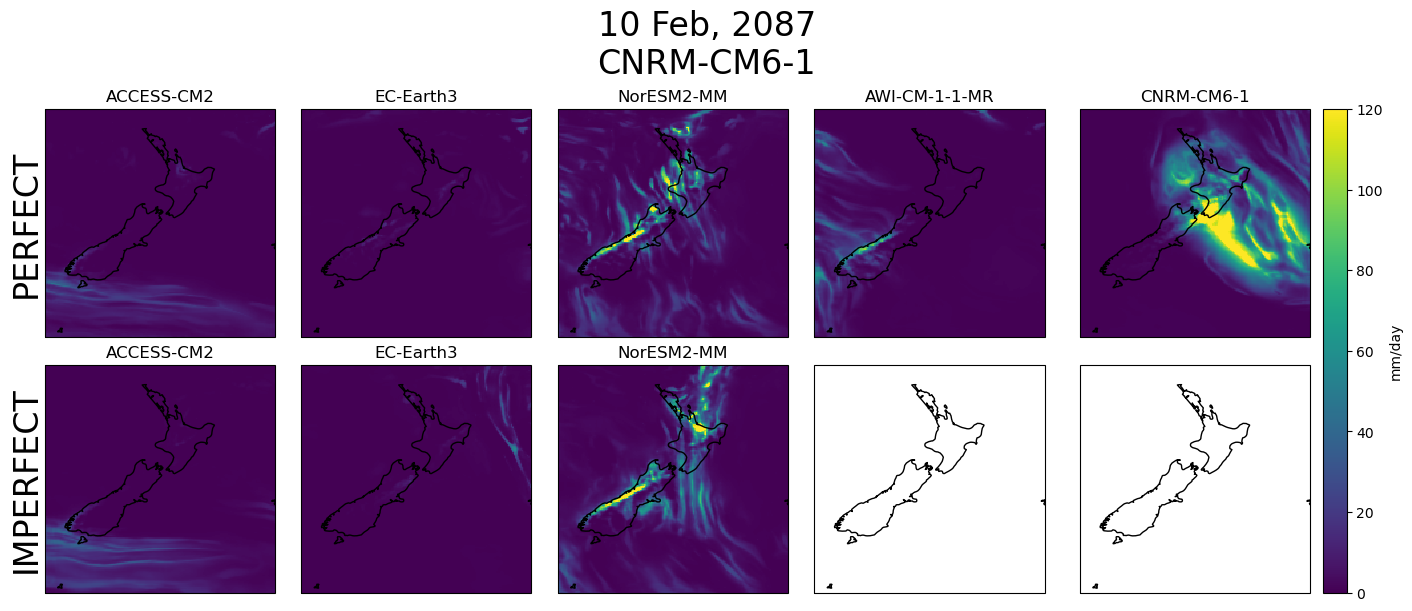

In [66]:
'''
EVENT 1

Ex-TC simulated by CCAM forced by CNRM-CM6-1 under SSP3-7.0 on 10 February 2087
'''

perfect_event = perfect_event_1
imperfect_event = imperfect_event_1 
title = '10 Feb, 2087\nCNRM-CM6-1'

fig,axs = plt.subplots(2,5,figsize=(14,6),sharex=True,sharey=True,layout='constrained',subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

for i,gcm in enumerate(['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM','AWI-CM-1-1-MR', 'CNRM-CM6-1']):
    im = perfect_event.pr.sel(GCM=gcm).plot(ax=axs[0][i],vmin=0,vmax=120,add_colorbar=False, transform=ccrs.PlateCarree())
    axs[0][i].set_title(gcm)
    
    if i == 0:
        axs[0][i].text(-0.08, 0.5, "PERFECT", transform=axs[0][i].transAxes,
        rotation=90, va='center', ha='center', fontsize=24)


for i,gcm in enumerate(['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM']):
    imperfect_event.pr.sel(GCM=gcm).plot(ax=axs[1][i],vmin=0,vmax=120,add_colorbar=False, transform=ccrs.PlateCarree())
    axs[1][i].set_title(gcm)
    
    if i == 0:
        axs[1][i].text(-0.08, 0.5, "IMPERFECT", transform=axs[1][i].transAxes,
        rotation=90, va='center', ha='center', fontsize=24)
    
    
    
cbar = fig.colorbar(im, ax=axs[:, 4], orientation='vertical')
cbar.set_label("mm/day")

for ax in axs.flatten():
    
    ax.coastlines(resolution='50m')
    ax.set_extent([164.86, 183.42, -51.2, -32.86], crs=ccrs.PlateCarree())


fig.suptitle(title,fontsize=24)

Text(0.5, 0.98, '26 March 1987\nNorESM2-MM')

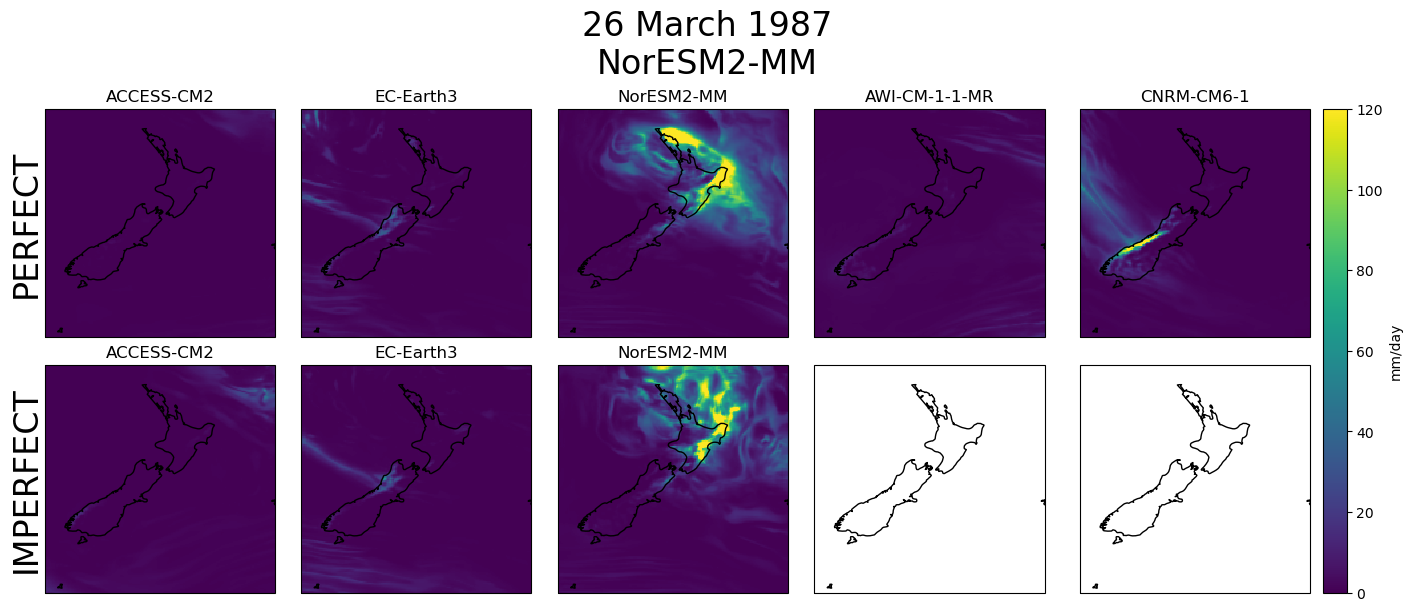

In [67]:
'''
EVENT 2

Model: NorESM2-MM
Experiment: historical
Date: 26 March 1987

'''

perfect_event = perfect_event_2
imperfect_event = imperfect_event_2 
title = '26 March 1987\nNorESM2-MM'

fig,axs = plt.subplots(2,5,figsize=(14,6),sharex=True,sharey=True,layout='constrained',subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

for i,gcm in enumerate(['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM','AWI-CM-1-1-MR', 'CNRM-CM6-1']):
    im = perfect_event.pr.sel(GCM=gcm).plot(ax=axs[0][i],vmin=0,vmax=120,add_colorbar=False, transform=ccrs.PlateCarree())
    axs[0][i].set_title(gcm)
    
    if i == 0:
        axs[0][i].text(-0.08, 0.5, "PERFECT", transform=axs[0][i].transAxes,
        rotation=90, va='center', ha='center', fontsize=24)


for i,gcm in enumerate(['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM']):
    imperfect_event.pr.sel(GCM=gcm).plot(ax=axs[1][i],vmin=0,vmax=120,add_colorbar=False, transform=ccrs.PlateCarree())
    axs[1][i].set_title(gcm)
    
    if i == 0:
        axs[1][i].text(-0.08, 0.5, "IMPERFECT", transform=axs[1][i].transAxes,
        rotation=90, va='center', ha='center', fontsize=24)
    
    
    
cbar = fig.colorbar(im, ax=axs[:, 4], orientation='vertical')
cbar.set_label("mm/day")

for ax in axs.flatten():
    
    ax.coastlines(resolution='50m')
    ax.set_extent([164.86, 183.42, -51.2, -32.86], crs=ccrs.PlateCarree())


fig.suptitle(title,fontsize=24)

Text(0.5, 0.98, '20 January 2095\nNorESM2-MM')

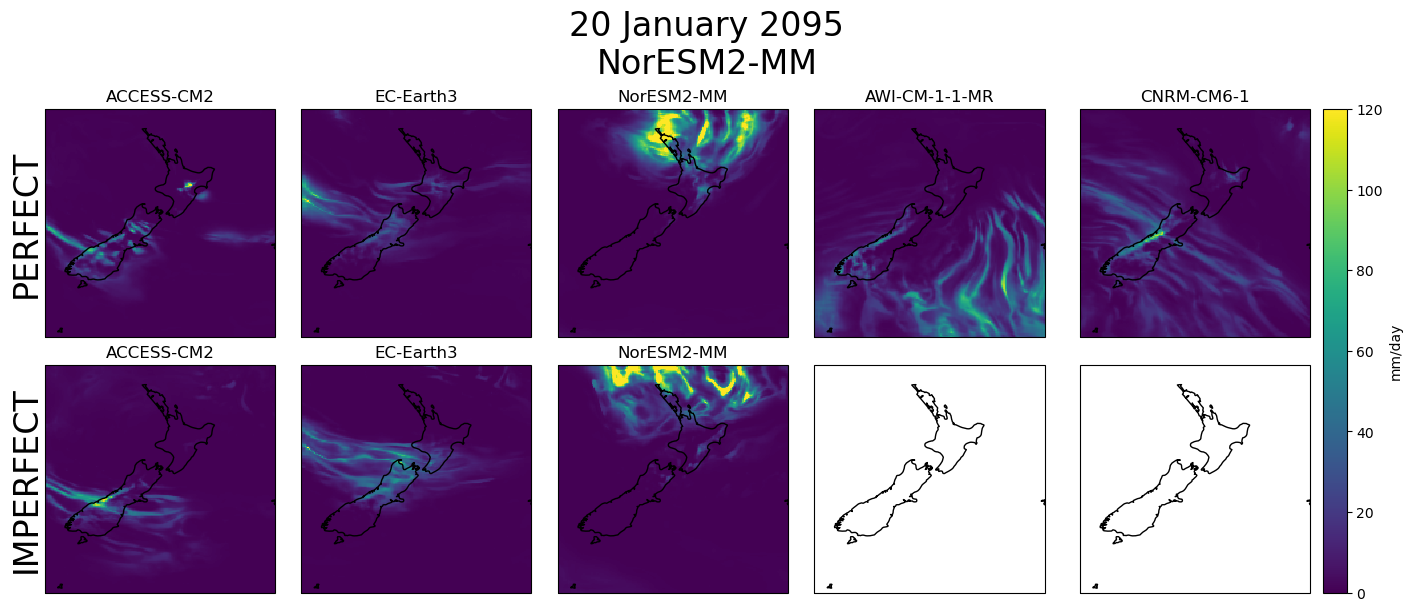

In [68]:
'''
EVENT 3

Model: NorESM2-MM
Experiment: SSP3-7.0
Date: 20 January 2095

'''

perfect_event = perfect_event_3
imperfect_event = imperfect_event_3 
title = '20 January 2095\nNorESM2-MM'

fig,axs = plt.subplots(2,5,figsize=(14,6),sharex=True,sharey=True,layout='constrained',subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

for i,gcm in enumerate(['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM','AWI-CM-1-1-MR', 'CNRM-CM6-1']):
    im = perfect_event.pr.sel(GCM=gcm).plot(ax=axs[0][i],vmin=0,vmax=120,add_colorbar=False, transform=ccrs.PlateCarree())
    axs[0][i].set_title(gcm)
    
    if i == 0:
        axs[0][i].text(-0.08, 0.5, "PERFECT", transform=axs[0][i].transAxes,
        rotation=90, va='center', ha='center', fontsize=24)


for i,gcm in enumerate(['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM']):
    imperfect_event.pr.sel(GCM=gcm).plot(ax=axs[1][i],vmin=0,vmax=120,add_colorbar=False, transform=ccrs.PlateCarree())
    axs[1][i].set_title(gcm)
    
    if i == 0:
        axs[1][i].text(-0.08, 0.5, "IMPERFECT", transform=axs[1][i].transAxes,
        rotation=90, va='center', ha='center', fontsize=24)
    
    
    
cbar = fig.colorbar(im, ax=axs[:, 4], orientation='vertical')
cbar.set_label("mm/day")

for ax in axs.flatten():
    
    ax.coastlines(resolution='50m')
    ax.set_extent([164.86, 183.42, -51.2, -32.86], crs=ccrs.PlateCarree())


fig.suptitle(title,fontsize=24)

In [2]:
def get_time_slices(direc,GCM,framework):
    
    if framework == 'perfect':
        da = xr.open_dataset(f'{direc}/{GCM}_pr_ssp370_perfect_framework_GAN.nc')
        
        da1 = da.sel(time=slice('1986','2005'))
        da2 = da.sel(time=slice('2080','2099'))
        
        combined = xr.concat([da1, da2], dim='time')
        combined = combined.sortby('time')
        
    elif framework == 'imperfect':
        # Emulator - imperfect
        da_hist = xr.open_dataset(f'{direc}/{GCM}_pr_historical_imperfect_framework_GAN.nc')
        da_future = xr.open_dataset(f'{direc}/{GCM}_pr_ssp370_imperfect_framework_GAN.nc')

        da1 = da_hist.sel(time=slice('1986','2005'))
        da2 = da_future.sel(time=slice('2080','2099'))
        
        combined = xr.concat([da1, da2], dim='time')
        combined = combined.sortby('time')
        
    return(combined)
    

In [5]:
def to_cftime_noleap_safe(da):
    """
    Convert datetime64[ns] time coordinate to cftime.DatetimeNoLeap, 
    skipping invalid leap day (Feb 29).
    """
    da = da.copy()
    
    # Get the datetime index
    time_index = da.indexes['time']  # pandas.DatetimeIndex

    # Filter out Feb 29
    valid_mask = ~((time_index.month == 2) & (time_index.day == 29))
    da = da.sel(time=valid_mask)
    time_index = da.indexes['time']

    # Convert each timestamp to cftime.DatetimeNoLeap
    cftime_time = [
        cftime.DatetimeNoLeap(t.year, t.month, t.day, t.hour, t.minute, t.second)
        for t in time_index
    ]
    da['time'] = cftime_time
    return da

In [3]:
'''
PERFECT DATA
'''

GCMs = ["AWI-CM-1-1-MR","CNRM-CM6-1","ACCESS-CM2","EC-Earth3","NorESM2-MM"]

da_list = []
for GCM in GCMs:
    
    print(GCM)
    
    direc = f'/nesi/project/niwa00018/queenle/NIWA-REMS_inference/output/{GCM}/NIWA-REMS_v110425_pr'

    da = get_time_slices(direc,GCM,'perfect')
    
    da = da.expand_dims(dim={'GCM': [GCM]})
    
    da_list.append(da)
    
perfect_combined = xr.concat(da_list, dim='GCM')
perfect_combined.to_netcdf('NIWA-REMS_v110425_pr_PERFECT_concat.nc')


AWI-CM-1-1-MR
CNRM-CM6-1
ACCESS-CM2
EC-Earth3
NorESM2-MM


In [3]:
'''
IMPERFECT DATA
'''

GCMs = ["ACCESS-CM2","EC-Earth3","NorESM2-MM"]

da_list = []
for GCM in GCMs:
    
    print(GCM)
    
    direc = f'/nesi/project/niwa00018/queenle/NIWA-REMS_inference/output/{GCM}/NIWA-REMS_v110425_pr'

    da = get_time_slices(direc,GCM,'imperfect')
    
    da = da.expand_dims(dim={'GCM': [GCM]})
    
    da_list.append(da)
    
# convert to NoLeapYear for "ACCESS-CM2","EC-Earth3"
for i in range(2):
    da_list[i] = to_cftime_noleap_safe(da_list[i])
    
imperfect_combined = xr.concat(da_list, dim='GCM')
imperfect_combined.to_netcdf('NIWA-REMS_v110425_pr_IMPERFECT_concat.nc')

ACCESS-CM2
EC-Earth3
NorESM2-MM


NameError: name 'to_cftime_noleap_safe' is not defined